In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data1 = np.loadtxt("./data/int_00.csv")
data2 = np.loadtxt("./data/int_01.csv")
data3 = np.loadtxt("./data/int_02.csv")
data4 = np.loadtxt("./data/int_03.csv")

In [3]:
data1 = np.asarray(data1)
data2 = np.asarray(data2)
data3 = np.asarray(data3)
data4 = np.asarray(data4)

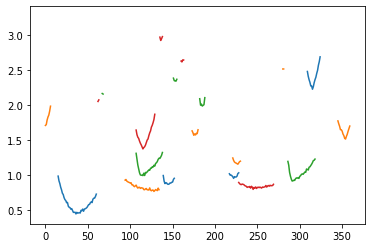

In [4]:
plt.plot(data1)
plt.plot(data2)
plt.plot(data3)
plt.plot(data4)

In [5]:
x1 = []; y1 = []
for r,deg in zip(data1, enumerate(data1)):
    if r != np.inf:
        x1.append( r * np.cos( deg[0] * np.pi/180 ))
        y1.append( r * np.sin( deg[0] * np.pi/180 ))

x2 = []; y2 = []
for r,deg in zip(data2, enumerate(data2)):
    if r != np.inf:
        x2.append( r * np.cos( deg[0] * np.pi/180 ))
        y2.append( r * np.sin( deg[0] * np.pi/180 ))

x3 = []; y3 = []
for r,deg in zip(data3, enumerate(data3)):
    if r != np.inf:
        x3.append( r * np.cos( deg[0] * np.pi/180 ))
        y3.append( r * np.sin( deg[0] * np.pi/180 ))

x4 = []; y4 = []
for r,deg in zip(data4, enumerate(data4)):
    if r != np.inf:
        x4.append( r * np.cos( deg[0] * np.pi/180 ))
        y4.append( r * np.sin( deg[0] * np.pi/180 ))


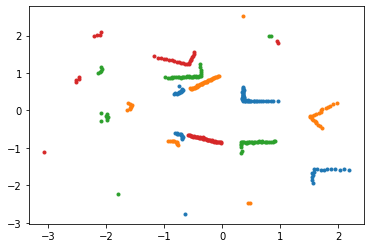

In [6]:
plt.plot(x1,y1, '.')
plt.plot(x2,y2, '.')
plt.plot(x3,y3, '.')
plt.plot(x4,y4, '.')

In [7]:
x, y = x1, y1

## Rotation: $\mathbf{R}_z(\theta)$

${}^A\mathbf{P} = \mathbf{R}(\theta) {}^B\mathbf{P} = 
\begin{bmatrix}
\cos(\theta) & -\sin(\theta) & 0\\
\sin(\theta) & \cos(\theta) & 0\\
0 & 0 & 1
\end{bmatrix}.
\begin{bmatrix}
{}^Bp_x\\
{}^Bp_y\\
{}^Bp_z
\end{bmatrix}
$

In [8]:
def rot(theta, angle = 'rad'):
    if angle == 'deg':
        theta = np.deg2rad(theta)
    rotate_matrix = np.array([[ np.cos(theta),   -np.sin(theta),     0.],
                            [   np.sin(theta),    np.cos(theta),     0.],
                            [   0.,               0.,                1.]])
    return rotate_matrix

In [9]:
len_points = len(x)
m_points = np.array([[x[0]], [y[0]], [0]])
for i in range(1, len_points):
    m_points = np.hstack((m_points,  np.array([[ x[i] ],[  y[i]  ],[0]])))

In [10]:
out = rot(5, angle = 'deg') @ m_points

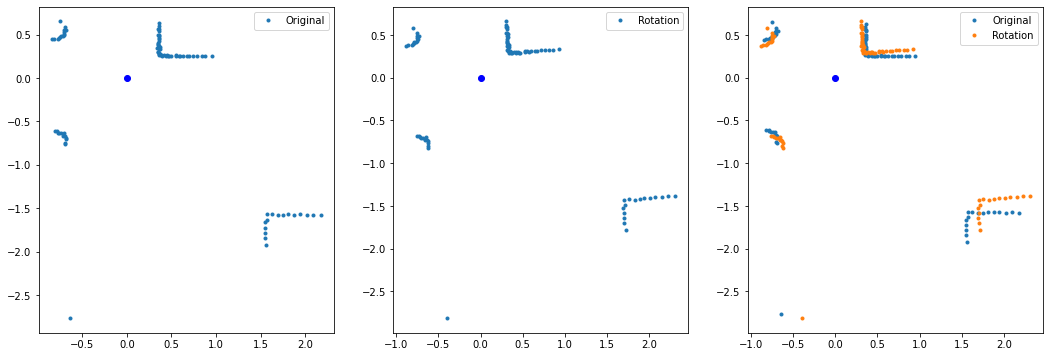

In [11]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (6*3,6))
ax1.plot(x,y, '.')
ax1.plot(0,0, 'b o')
ax1.legend(["Original"])
ax2.plot(out[0,:], out[1,:],'.')
ax2.plot(0,0, 'b o')
ax2.legend(["Rotation"])
ax3.plot(x,y, '.')
ax3.plot(out[0,:], out[1,:],'.')
ax3.plot(0,0, 'b o')
ax3.legend(["Original","Rotation"])

## Rotation and Translation: $`\mathbf{T}(\theta, Q)`$

${}^A\mathbf{P} = \mathbf{T}(\theta, Q) {}^B\mathbf{P} = 
\begin{bmatrix}
\cos(\theta) & -\sin(\theta) & 0 & q_x\\
\sin(\theta) & \cos(\theta) & 0 & q_y\\
0 & 0 & 1 & q_z\\ 
0 & 0 & 0 & 1\\
\end{bmatrix}.
\begin{bmatrix}
{}^Bp_x & ..\\
{}^Bp_y & ..\\
{}^Bp_z & ..\\
1 & ..
\end{bmatrix}$

In [51]:
def tf(theta, S, Q, angle = 'rad'):
    if angle == 'deg':
        theta = np.deg2rad(theta)
    th_matrix = np.array([[np.cos(theta),   -np.sin(theta), 0.,      Q[0]],
                          [np.sin(theta),   np.cos(theta),  0.,      Q[1]],
                          [0.,        0.,                   1.,      Q[2]],
                          [0.,        0.,                   0.,      S]])
    return th_matrix

In [52]:
# add scale and translation
len_points = len(x)
m_points = np.array([[x[0]], [y[0]], [0], [1]])
for i in range(1, len_points):
    m_points = np.hstack((m_points,  np.array([[ x[i] ],[  y[i]  ],[0], [1]])))

In [16]:
Q = np.array([0.2, 0.2, 0.0])
theta = 5
out = tf(theta, 1.0, Q, angle = 'deg') @ m_points
# out = tf(0, 1.0, Q, angle = 'deg') @ out
zro = tf(theta, 1.0, Q, angle = 'deg') @ np.array([[0],[0],[0],[1]])
# zro = tf(0, 1.0, Q, angle = 'deg') @ zro

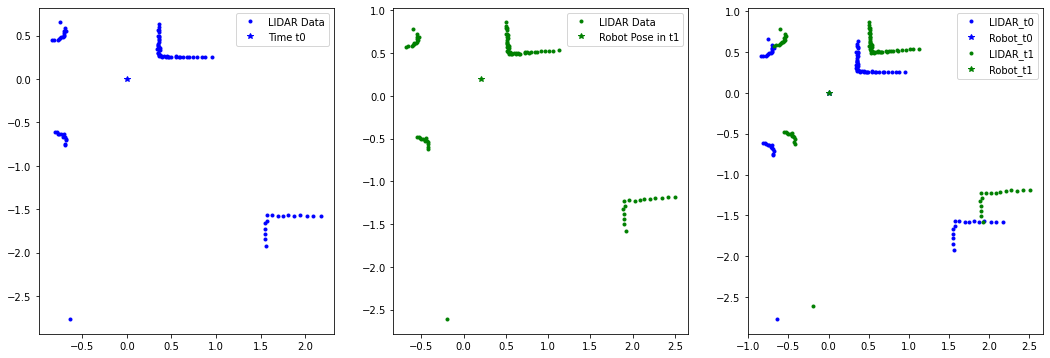

In [18]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (6*3,6))
ax1.plot(x,y, 'b .')
ax1.plot(0,0, 'b *')
ax1.legend(["LIDAR Data","Time t0"])
ax2.plot(out[0,:], out[1,:],'g .')
ax2.plot(zro[0],zro[1], 'g *')
ax2.legend(["LIDAR Data","Robot Pose in t1"])
ax3.plot(x,y, 'b .')
ax3.plot(0,0, 'b *')
ax3.plot(out[0,:], out[1,:],'g .')
ax3.plot(0,0, 'g *')
ax3.legend(["LIDAR_t0","Robot_t0", "LIDAR_t1","Robot_t1"])

In [19]:
import icp_example

In [20]:
previous_points = np.vstack((out[0,:], out[1,:]))
current_points = np.vstack((x, y))

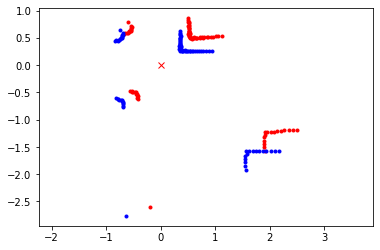

Residual: 28.24983572829126


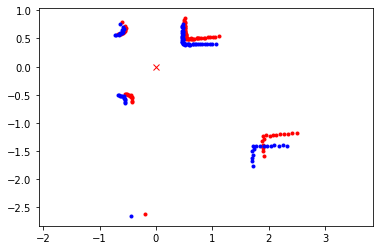

Residual: 11.922612988100665


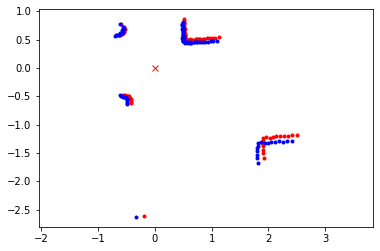

Residual: 5.831529925770011


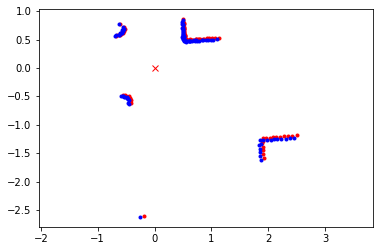

Residual: 3.115009488580176


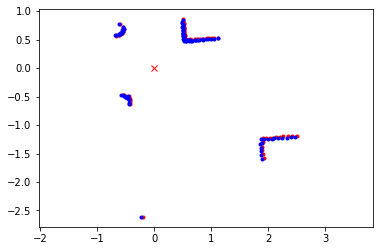

Residual: 1.7885319115589908


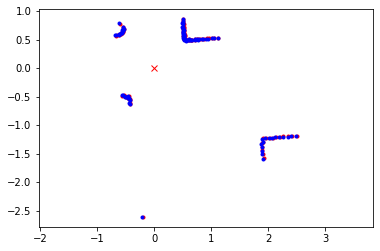

Residual: 0.6878380646224765


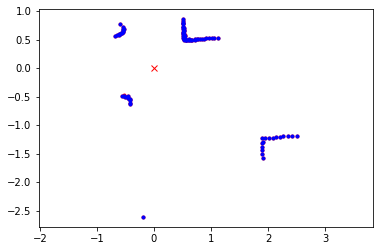

Residual: 0.02142746505139748


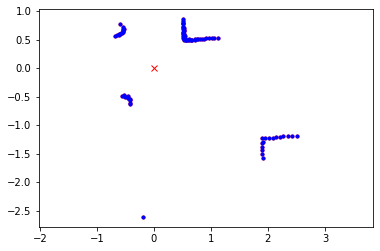

Residual: 6.223958032683952e-14


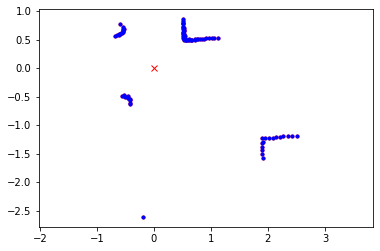

Residual: 5.572221974257373e-14
Converge 5.572221974257373e-14 6.517360584265793e-15 9


In [21]:
R, T = icp_example.icp_matching(previous_points, current_points)

In [22]:
print("--Prediction--")
print(
np.round(
np.array([
    [R[0,0] ,R[0,1] ,0      , T[0]  ],
    [R[1,0] ,R[1,1] ,0      , T[1]  ],
    [0      ,0      ,1      , 0     ],
    [0      ,0      ,0      ,1      ]
]), 2))
print("--Real--")
print(np.round(tf(theta, 1.0, Q, angle = 'deg'),2))

--Prediction--
[[ 1.   -0.09  0.    0.21]
 [ 0.09  1.    0.    0.19]
 [ 0.    0.    1.    0.  ]
 [ 0.    0.    0.    1.  ]]
--Real--
[[ 1.   -0.09  0.    0.2 ]
 [ 0.09  1.    0.    0.2 ]
 [ 0.    0.    1.    0.  ]
 [ 0.    0.    0.    1.  ]]
